# Open Alex Scraper

In [1]:
#exponential of the log of i10 index - 2 year mean citedness



#pip install pyalex
#needed in terminal if computer hasn't already downloaded it yet

In [2]:
from pyalex import Works, Authors, Sources, Institutions, Concepts, Publishers

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

Get User Inputs

In [6]:
#Get the research industry you are looking into and # of works to lookup

In [7]:
keyword_search = input("keyword: ").lower()

keyword: robotics


In [8]:
number_search = int(input("number of authors: "))

number of authors: 30


In [9]:
print(keyword_search)
print(number_search)

robotics
30


Scrape OpenAlex to make DataFrame

In [10]:
#creates a page with #number_search amount of works related to keyword_search

In [11]:
pager = Works().search(keyword_search).paginate(per_page=20)

In [12]:
#create empty DF to collect authors name and id

In [13]:
authorsDF = pd.DataFrame({'id':[], 'name':[]})

In [14]:
authorsDF

,id,name


In [15]:
#fill authorsDF with unique list of names and ids
#version - limit on # of authors with number_search
first_time = 0
for page in pager:
    for work in page:
        authors = dict(work)['authorships']
        for author in authors:
            author_dict = author['author']
            new_row = {'id':author_dict['id'], 'name':author_dict['display_name']}
            if first_time==0:
                authorsDF=pd.concat([authorsDF,pd.DataFrame([new_row])],ignore_index=True)
                first_time+=1
            elif len(authorsDF) < number_search:
                if authorsDF['id'].str.contains(new_row['id']).any():
                    pass
                else:
                    authorsDF=pd.concat([authorsDF,pd.DataFrame([new_row])],ignore_index=True)
            else: 
                break
    if len(authorsDF)==number_search:
        break
    else:
        pass
        

In [16]:
authorsDF

,id,name
0,https://openalex.org/A4356795959,Rodney A. Brooks
1,https://openalex.org/A5051336665,Oussama Khatib
2,https://openalex.org/A4358946033,Alain Geiger
3,https://openalex.org/A4337548936,Patrick Lenz
4,https://openalex.org/A4349724774,Charles A. Stiller
5,https://openalex.org/A4352436120,Raquel Urtasun
6,https://openalex.org/A5010910465,Suguru Arimoto
7,https://openalex.org/A5049438840,Sadao Kawamura
8,https://openalex.org/A5084514057,Fumio Miyazaki
9,https://openalex.org/A4354513452,Daniela Rus


In [17]:
len(authorsDF)

30

In [18]:
#list of author IDs to iterate through
author_id_list = authorsDF.loc[:,'id']

In [19]:
#empty DF to collect stats on authors
authorStatDF = pd.DataFrame({'id':[], 'works_count':[], 'cited_by_count':[], '2yr_mean_citedness':[],
                          'h_index':[], 'i10_index':[]})

In [29]:
authorStatDF

,id,works_count,cited_by_count,2yr_mean_citedness,h_index,i10_index
0,https://openalex.org/A4356795959,2.0,6973.0,0.000000,2.0,2.0
1,https://openalex.org/A4356795959,2.0,6973.0,0.000000,2.0,2.0
2,https://openalex.org/A4358946033,265.0,9697.0,0.000000,33.0,81.0
3,https://openalex.org/A4337548936,276.0,7623.0,0.000000,26.0,42.0
4,https://openalex.org/A4349724774,142.0,8984.0,0.666667,29.0,45.0
5,https://openalex.org/A4352436120,453.0,38832.0,2.954839,82.0,253.0
6,https://openalex.org/A4354513452,934.0,32645.0,3.664740,92.0,398.0
7,https://openalex.org/A4351712793,63.0,6591.0,2.416667,22.0,32.0
8,https://openalex.org/A4359492125,363.0,53434.0,2.000000,96.0,235.0
9,https://openalex.org/A4335087887,3.0,2004.0,0.000000,2.0,2.0


In [28]:
#get each author statistics
#gets works_count, cited_by_count, 2yr_mean_citedness, h_index, i10_index
#takes about 5 minutes to run for ~500 elements, could be more efficient?
for au_id in author_id_list:
    try:
        auth_dict = dict(Authors()[au_id])
    except:
        continue
    else:
        new_row = {'id':auth_dict['id'], 'works_count':auth_dict['works_count'], 'cited_by_count':auth_dict['cited_by_count'],
              '2yr_mean_citedness':auth_dict['summary_stats']['2yr_mean_citedness'],
               'h_index':auth_dict['summary_stats']['h_index'], 'i10_index':auth_dict['summary_stats']['i10_index']}
        authorStatDF=pd.concat([authorStatDF,pd.DataFrame([new_row])],ignore_index=True)
    

In [30]:
print(len(authorStatDF))
print(len(authorsDF))

24
30


Transform Dataframes

In [35]:
#join authorsDF and authorStatDF for final DF of all scraped data
final_authorDF = authorStatDF.merge(authorsDF, on='id', how='left')

In [36]:
print(len(authorStatDF))
print(len(final_authorDF))

24
24


In [37]:
final_authorDF

,id,works_count,cited_by_count,2yr_mean_citedness,h_index,i10_index,name
0,https://openalex.org/A4356795959,2.0,6973.0,0.000000,2.0,2.0,Rodney A. Brooks
1,https://openalex.org/A4356795959,2.0,6973.0,0.000000,2.0,2.0,Rodney A. Brooks
2,https://openalex.org/A4358946033,265.0,9697.0,0.000000,33.0,81.0,Alain Geiger
3,https://openalex.org/A4337548936,276.0,7623.0,0.000000,26.0,42.0,Patrick Lenz
4,https://openalex.org/A4349724774,142.0,8984.0,0.666667,29.0,45.0,Charles A. Stiller
5,https://openalex.org/A4352436120,453.0,38832.0,2.954839,82.0,253.0,Raquel Urtasun
6,https://openalex.org/A4354513452,934.0,32645.0,3.664740,92.0,398.0,Daniela Rus
7,https://openalex.org/A4351712793,63.0,6591.0,2.416667,22.0,32.0,Michael T. Tolley
8,https://openalex.org/A4359492125,363.0,53434.0,2.000000,96.0,235.0,Sebastian Thrun
9,https://openalex.org/A4335087887,3.0,2004.0,0.000000,2.0,2.0,Berthold K. P. Horn


In [38]:
final_authorDF.isna().sum().sum()

0

In [39]:
final_authorDF.describe(include='all')

,id,works_count,cited_by_count,2yr_mean_citedness,h_index,i10_index,name
count,24,24.000000,24.000000,24.000000,24.000000,24.000000,24
unique,23,NaN,NaN,NaN,NaN,NaN,23
top,https://openalex.org/A4356795959,NaN,NaN,NaN,NaN,NaN,Rodney A. Brooks
freq,2,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,885.291667,23385.916667,1.429433,41.458333,291.583333,NaN
std,NaN,3233.780658,55325.850385,1.583736,39.621008,984.571101,NaN
min,NaN,2.000000,2004.000000,0.000000,2.000000,2.000000,NaN
25%,NaN,75.000000,5138.500000,0.000000,21.750000,35.750000,NaN
50%,NaN,191.500000,9340.500000,0.833333,31.000000,59.500000,NaN
75%,NaN,365.500000,12172.250000,2.512500,42.750000,125.000000,NaN


In [37]:
#create calculated column (will become pseudo Q score) - can change this equation to change plot below
final_authorDF['calculated'] = np.exp(np.log(final_authorDF['i10_index']) - final_authorDF['2yr_mean_citedness'])

In [38]:
final_authorDF

,id,name,works_count,cited_by_count,2yr_mean_citedness,h_index,i10_index,calculated
0,https://openalex.org/A4356795959,Rodney A. Brooks,2.0,6964.0,0.000000,2.0,2.0,2.000000
1,https://openalex.org/A2135302480,Oussama Khatib,87.0,13648.0,0.000000,33.0,56.0,56.000000
2,https://openalex.org/A4358946033,Alain Geiger,265.0,9602.0,0.000000,33.0,82.0,82.000000
3,https://openalex.org/A4337548936,Patrick Lenz,276.0,7527.0,0.000000,27.0,42.0,42.000000
4,https://openalex.org/A4349724774,Charles A. Stiller,142.0,8878.0,0.666667,29.0,45.0,23.103770
5,https://openalex.org/A4352436120,Raquel Urtasun,453.0,38401.0,2.935484,81.0,252.0,13.382464
6,https://openalex.org/A4344821506,Suguru Arimoto,290.0,7451.0,0.000000,30.0,73.0,73.000000
7,https://openalex.org/A4356414827,Sadao Kawamura,361.0,5143.0,2.171429,22.0,49.0,5.586717
8,https://openalex.org/A4334914832,Fumio Miyazaki,231.0,4050.0,0.000000,16.0,35.0,35.000000
9,https://openalex.org/A4359492125,Sebastian Thrun,363.0,53262.0,2.000000,96.0,235.0,31.803792


In [49]:
#rename DF so easier to work with
df = final_authorDF

In [50]:
#create rank column based on calculated column
#will be used to create color column later
df['rank'] = df['calculated'].rank(method='dense', ascending=False)

In [51]:
df.sort_values(by = ['rank'])

,id,name,works_count,cited_by_count,2yr_mean_citedness,h_index,i10_index,calculated,rank
36,https://openalex.org/A4356685285,Xin Li,36616.0,590306.0,4.087388,235.0,11084.0,11088.087388,1.0
79,https://openalex.org/A4355341830,Yu Wang,22677.0,409679.0,4.424009,217.0,7986.0,7990.424009,2.0
78,https://openalex.org/A4353318669,Li Guo,4733.0,100999.0,15.851406,99.0,1250.0,1265.851406,3.0
52,https://openalex.org/A4354565457,Lu Yu,2595.0,35426.0,4.110360,76.0,699.0,703.110360,4.0
38,https://openalex.org/A4354760101,Yong Yuan,1262.0,25325.0,5.266667,77.0,525.0,530.266667,5.0
...,...,...,...,...,...,...,...,...,...
58,https://openalex.org/A4349665676,Jaeho Im,12.0,167.0,0.000000,1.0,1.0,1.000000,90.0
81,https://openalex.org/A2560270779,Mitchell Arnett,2.0,298.0,0.000000,2.0,1.0,1.000000,90.0
80,https://openalex.org/A2338804187,Kevin Delmolino,2.0,298.0,0.000000,2.0,1.0,1.000000,90.0
62,https://openalex.org/A4340413750,Adam Hayes,1.0,245.0,0.000000,1.0,1.0,1.000000,90.0


In [52]:
number_search * 0.8

80.0

In [53]:
number_search * 0.2

20.0

In [54]:
#function to create new column using rank in order to color by top 20%, mid 60%,
# and bottom 20%
def sort_ranks(rank_num):
    top_20 = number_search*0.2
    top_80 = number_search*0.8
    if rank_num <= top_20:
        return 'top20%'
    elif rank_num > top_20 and rank_num <= top_80:
        return 'mid60%'
    else:
        return 'bottom20%'

In [55]:
#create colors column with above function
df['colors'] = df['rank'].apply(sort_ranks)

In [56]:
df.sort_values(by = ['rank'])

,id,name,works_count,cited_by_count,2yr_mean_citedness,h_index,i10_index,calculated,rank,colors
36,https://openalex.org/A4356685285,Xin Li,36616.0,590306.0,4.087388,235.0,11084.0,11088.087388,1.0,top20%
79,https://openalex.org/A4355341830,Yu Wang,22677.0,409679.0,4.424009,217.0,7986.0,7990.424009,2.0,top20%
78,https://openalex.org/A4353318669,Li Guo,4733.0,100999.0,15.851406,99.0,1250.0,1265.851406,3.0,top20%
52,https://openalex.org/A4354565457,Lu Yu,2595.0,35426.0,4.110360,76.0,699.0,703.110360,4.0,top20%
38,https://openalex.org/A4354760101,Yong Yuan,1262.0,25325.0,5.266667,77.0,525.0,530.266667,5.0,top20%
...,...,...,...,...,...,...,...,...,...,...
58,https://openalex.org/A4349665676,Jaeho Im,12.0,167.0,0.000000,1.0,1.0,1.000000,90.0,bottom20%
81,https://openalex.org/A2560270779,Mitchell Arnett,2.0,298.0,0.000000,2.0,1.0,1.000000,90.0,bottom20%
80,https://openalex.org/A2338804187,Kevin Delmolino,2.0,298.0,0.000000,2.0,1.0,1.000000,90.0,bottom20%
62,https://openalex.org/A4340413750,Adam Hayes,1.0,245.0,0.000000,1.0,1.0,1.000000,90.0,bottom20%


Plot Data

In [57]:
#determine plot axes
x = df['calculated'].values
y = df['h_index'].values

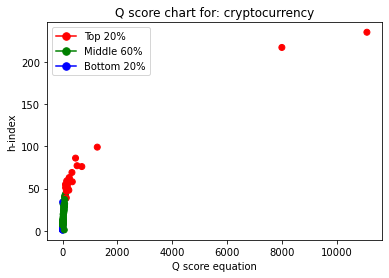

In [58]:
#create basic plot without data
fig, ax = plt.subplots()

#create color dictionary, can change to change colors on plot
color_dict = {'top20%':'red', 'mid60%':'green', 'bottom20%':'blue'}

#initialize scatterplot using axes and colors above
sc = plt.scatter(x, y, c=df.colors.map(color_dict))

#create empty annotation, will be utilized by update_annot and hover functions below
annot = ax.annotate("", xy=(0, 0), xytext=(-50, 10), textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

#function to update annotation using position of cursor on plot
#currently updates annotation to the name of the author but can be any part of the dataframe
#set text variable to what you want the hover annotation to display
def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "Name: {}".format(df.loc[ind["ind"][0], 'name'])
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)

#function to check whether cursor is over the plot, and to update the annotation if
#the cursor moves over a point on the scatterplot
#and to hide it if the cursor moves away from the points
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

#use matplotlib event abilities to detect cursor movement
fig.canvas.mpl_connect("motion_notify_event", hover)

#create the labels and title of the plot
plt.xlabel("Psuedo Q score equation")
plt.ylabel("h-index")
plt.title("Psuedo Q score chart for: " + keyword_search)

#import few extras from matplotlib needed for separate legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#create separate legend to describe colors, needs to be updated separately from the colors_dict above
legend_elements = [Line2D([0], [0], marker='.', color='red', label='Top 20%',
                          markerfacecolor='red', markersize=15),
                   Line2D([0], [0], marker='.', color='green', label='Middle 60%',
                          markerfacecolor='green', markersize=15),
                  Line2D([0], [0], marker='.', color='blue', label='Bottom 20%',
                          markerfacecolor='blue', markersize=15),]

#set legend in upper left corner
ax.legend(handles=legend_elements, loc='upper left')

#display the plot
plt.show()